In [ ]:
install.packages('arules')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('arulesViz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the libraries
library(arules)
library(arulesViz)
library(datasets)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
# Load the data set
data(Groceries)

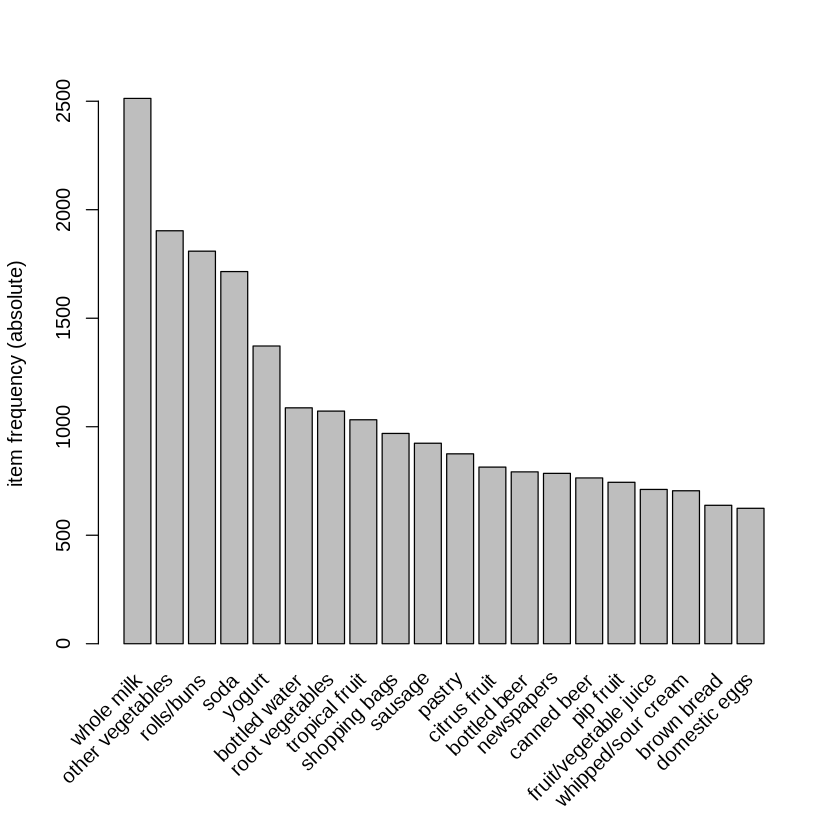

In [ ]:
# Create an item frequency plot for the top 20 items
itemFrequencyPlot(Groceries,topN=20,type="absolute")

In [ ]:
# Get the rules
rules <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
# Show top 5 rules, but only 2 digits
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [ ]:
# Sorting rules by confidence
rules<-sort(rules, by="confidence", decreasing=TRUE)

In [ ]:
rules <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8,maxlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.01s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
subset.matrix <- is.subset(rules, rules)
subset.matrix[lower.tri(subset.matrix, diag=T)] <- NA
redundant <- colSums(subset.matrix, na.rm=T) >= 1
rules.pruned <- rules[!redundant]
rules<-rules.pruned


Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
“x[.] <- val: x is “ngTMatrix”, val not in {TRUE, FALSE} is coerced; NA |--> TRUE.”


In [ ]:
rules<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08), 
               appearance = list(default="lhs",rhs="whole milk"),
               control = list(verbose=F))
rules<-sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])


    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rules<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2), 
               appearance = list(default="rhs",lhs="whole milk"),
               control = list(verbose=F))
rules<-sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


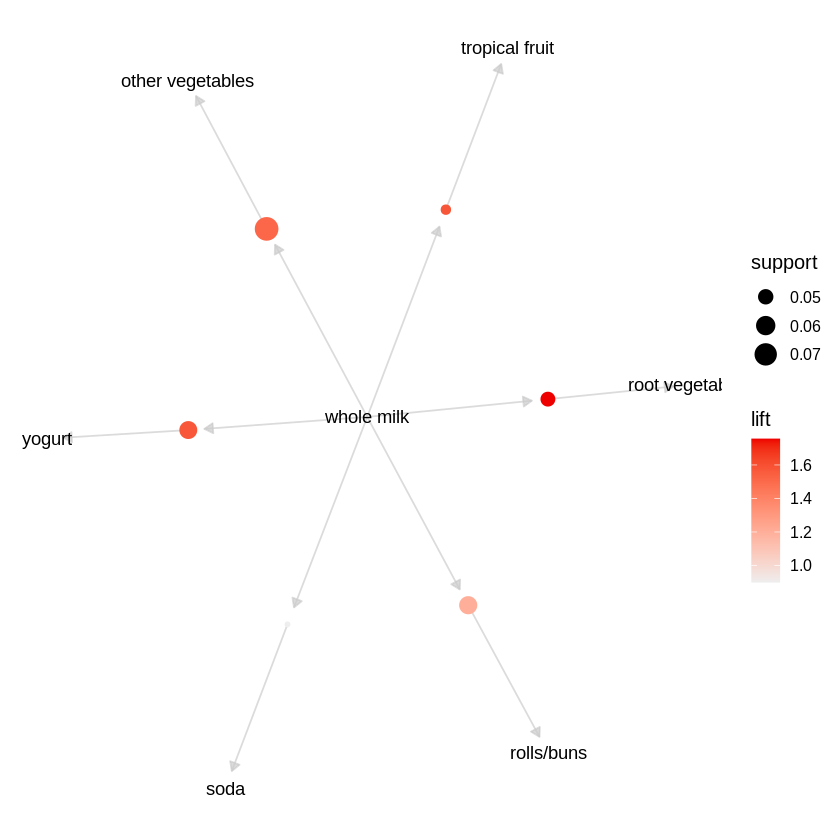

In [ ]:
plot(rules, method="graph")